### **Correlation-Matrix with Heatmap**

- **Correlation** is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other
- **Good variables are highly correlated with the target**
- Correlated predictor variables provide redundant information
- **Variables should be correlated with the target but uncorrelated among themselves**
- Correlation feature selection evaluates subsets of features on the basis of the following hypothesis:
- "Good feature subsets contain features highly correlated with the target, yet uncorrelated among themselves"



- Inorder to select feature based on correlation between two features, we can find the features that are correlated with each other. By identifying these features, we can then decide which features we want to keep and which ones we want to remove.

- Using pearson correlation our returned coefficient values will vary between -1 and 1
- if the correlation between two features is 0, this means that changing any of these 2 features will not affect the other
- If the correlation between two features is > 0 , then this means that, increasing the values in one feature will also make an increase in the values of the other feature. The closer this correlation coefficient is to 1, the stronger is going to be this bond between the two different features
- If the correlation coefficient between the two features is less than 0, this means that increasing the values in one feature will make a decrease in the value of the other feature(the closer the coefficient is to -1, the stronger is going to be this relationship between the two different features)
- In this analysis, we will check if the selected variabled are highly correlated with each other. If they are, we would then need to keep just one of the correlated ones and drop the others

In [16]:
# Load iris data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris

iris = load_iris()

# create features and target

X = iris.data
y = iris.target



In [7]:
# convert feature matrix into dataframe

df = pd.DataFrame(X)

# View the dataframe

df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# create correlation matrix

corr_matrix = df.corr()
corr_matrix

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


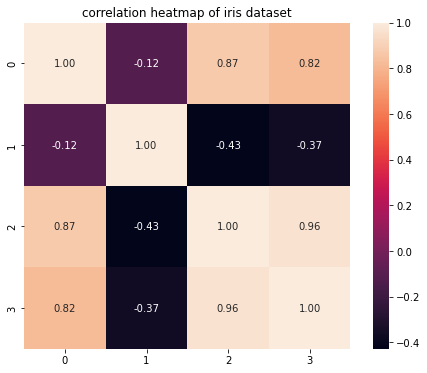

In [13]:
# create correlation heatmap

plt.figure(figsize=(8, 6))
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
#a.set_xticklabels(a.get_xticklabels(), rotation= 30)
#a.set_yticklabels(a.get_yticklabels(), rotation = 30)
plt.title("correlation heatmap of iris dataset")
plt.show()



In [17]:
# Select upper traiangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [19]:
# Find index of feature columns with correlation greater than 0.9

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print(to_drop)

[3]


In [21]:
# Drop Marked Features

df1 = df.drop(df.columns[to_drop], axis = 1)
df1

,0,1,2
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


- We can see that we have dropped the third column from the original dataset